<a href="https://colab.research.google.com/github/sharop/CD3001B/blob/main/SEM_2/Path_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# graphviz is installed already, but need lib too
!apt install libgraphviz-dev
!pip install pygraphviz
!pip install semopy


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Ejemplo de grafica

In [2]:
import pygraphviz as pgv

# Crear el grafo
G = pgv.AGraph(strict=False, directed=True)

# Agregar nodos
G.add_node("E", label="Educación")
G.add_node("I", label="Ingreso")

# Agregar arcos
G.add_edge("E", "I")

# Mostrar el grafo
G.draw("senderos.png", prog="dot")


# Ejemplo 2

Para este ejemplo, utilizaremos un conjunto de datos de la Encuesta Nacional de Salud y Nutrición de los Estados Unidos (NHANES) para investigar la relación entre la actividad física y la obesidad.

In [3]:
import pandas as pd
import numpy as np
import semopy
from semopy import Model, semplot
from sklearn.preprocessing import MinMaxScaler
from scipy import stats




In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/GTPB/PSLS20/master/data/NHANES.csv")


In [5]:
data['Gender']= (data['Gender']=="male").replace({True: 1, False: 0}) 
data['PhysActive'] = (data['PhysActive'] == "Yes").replace({True: 1, False: 0}) 
data['Obesity']=((data.Weight/((data.Height/100)**2)) >30).replace({True: 1, False: 0})

In [6]:
data = data[["Obesity","Age", "Gender", "PhysActive", "Height", "Weight"]]


A continuación, definimos las variables que vamos a utilizar en nuestro modelo y creamos una matriz de correlación para evaluar la relación entre ellas:

In [7]:

# Definimos las variables
x1 = data['Age']
x2 = data['Gender'] ##(data['Gender']=="male").replace({True: 1, False: 0}) 
x3 = data['PhysActive'] #(data['PhysActive'] == "Yes").replace({True: 1, False: 0}) 
y = data['Obesity']#((data.Weight/((data.Height/100)**2)) >30).replace({True: 1, False: 0})
# Creamos la matriz de correlación
corr = np.corrcoef([x1, x2, x3, y])


Después, definimos el modelo de senderos utilizando la notación estándar y los coeficientes de regresión a partir de la matriz de correlación:

In [14]:
# Definimos el modelo utilizando la notación estándar
model = Model('''
    Obesity ~ Age + Gender + PhysActive
    PhysActive ~ Age
''')


In [ ]:
#model.load_cov(corr)
##Age -> Obesity
#    Gender -> Obesity
#    PhysActive -> Obesity
#    Age -> PhysActive
#



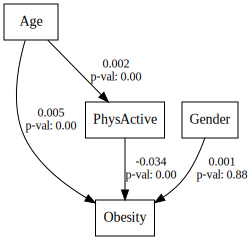

In [18]:
semopy.semplot(model, "model.png")

En el modelo definido, `edad`, `genero`, y `fisicamente_activo` son las variables predictoras y `obesidad` es la variable de criterio o dependiente. Además, en el modelo se establecen las siguientes relaciones:

- `edad` tiene un efecto directo sobre `obesidad`
- `genero` tiene un efecto directo sobre `obesidad`
- `fisicamente_activo` tiene un efecto directo sobre `obesidad`
- `edad` tiene un efecto directo sobre `fisicamente_activo`

Finalmente, ajustamos el modelo y evaluamos los resultados:

In [11]:
# Ajustamos el modelo utilizando SEM
model.fit(data)


[[1.         0.425      1.         0.         0.69434932 0.37121545]
 [1.         0.425      1.         0.         0.69434932 0.37121545]
 [1.         0.425      1.         0.         0.69434932 0.37121545]
 ...
 [1.         0.3375     1.         0.         0.78938356 0.41202282]
 [0.         0.75       1.         0.         0.72945205 0.33172444]
 [0.         0.75       1.         0.         0.72945205 0.33172444]]


In [19]:

# Evaluamos los resultados
print(model.inspect(mode='list', what="names", std_est=True))

         lval  op        rval  Estimate  Est. Std  Std. Err    z-value  \
0  PhysActive   ~         Age  0.002039  0.091557  0.000222   9.194355   
1     Obesity   ~         Age  0.004956  0.248304  0.000194  25.500746   
2     Obesity   ~      Gender  0.001319  0.001476  0.008669   0.152196   
3     Obesity   ~  PhysActive -0.034447 -0.038437  0.008719  -3.950684   
4  PhysActive  ~~  PhysActive  0.246718  0.991617  0.003489  70.710678   
5     Obesity  ~~     Obesity  0.187568  0.938643  0.002653  70.710678   

    p-value  
0  0.000000  
1  0.000000  
2  0.879032  
3  0.000078  
4  0.000000  
5  0.000000  


In [21]:
semopy.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,4,8,17.255766,0.001724,751.443045,0.98217,0.977036,0.954073,0.977036,0.96434,0.018205,11.996549,55.258591,0.001726


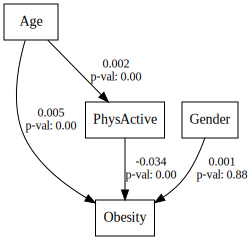

In [22]:
semopy.semplot(model, "model.png")

 Finalmente, evaluamos los resultados mediante el método `summary` que nos muestra una tabla que contiene los coeficientes de regresión, los errores estándar, los valores t y los valores p correspondientes para cada variable.

Es importante mencionar que el modelo de senderos puede ser modificado y ajustado según sea necesario, y que `semopy` ofrece varias funciones y métodos para hacerlo.